In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento','petal_largura','tipo']
df = pd.read_csv('iris-dataset.csv', names=columns);

In [7]:
df.head()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_comprimento    150 non-null float64
sepal_largura        150 non-null float64
petal_comprimento    150 non-null float64
petal_largura        150 non-null float64
tipo                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df['tipo'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: tipo, dtype: int64

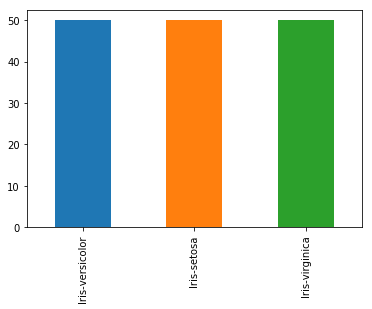

In [11]:
df['tipo'].value_counts().plot(kind='bar');

### Separacao feature e label

In [13]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Separando train e test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9, random_state=42, stratify=y);

## Metricas

In [18]:
def accuracy(y, y_pred):
    return np.sum(y == y_pred) / y_pred.shape[0]

# Regresao Logistica

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
LR = LogisticRegression(multi_class='auto', solver='lbfgs')

In [29]:
LR.fit(X_train,y_train)
pred = LR.predict(X_test)

In [31]:
accuracy(y_test,pred)

0.9703703703703703

# Criando matrix de confusao

In [44]:
from sklearn.metrics import confusion_matrix

In [64]:
mc = confusion_matrix(y_test, pred,labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])

In [65]:
mc

array([[45,  0,  0],
       [ 0, 42,  3],
       [ 0,  1, 44]])